<a href="https://colab.research.google.com/github/junheeyoon/colab/blob/master/4_5_DL_Tensorflow_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 과제





## CNN기초
원본 데이터를 2차원으로 놓고 필터(또는 feature detector)라는 사각형 윈도우를 씌운다음에 움직이면서 새로운 값을 만들어 낸다.
이때 움직이는 과정을 convolution이라고 하고, 필터가 움직이는 방향이 한 방향이면 1D-CNN이고 두 방향이면 2D-CNN이다.

1차원 CNN이라 하더라도 필터의 사각형이 반드시 1차원인건 아니다. 움직이는 콘볼루션 방향및 결과로 나오는 배열이 1차원인지 2차원인지 따지는 것

## 2D CNN으로 MNIST 데이터 분류 (워밍업)

### 데이터 읽기

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
TensorFlow version :  2.4.1
Keras version :  2.4.3


In [2]:
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

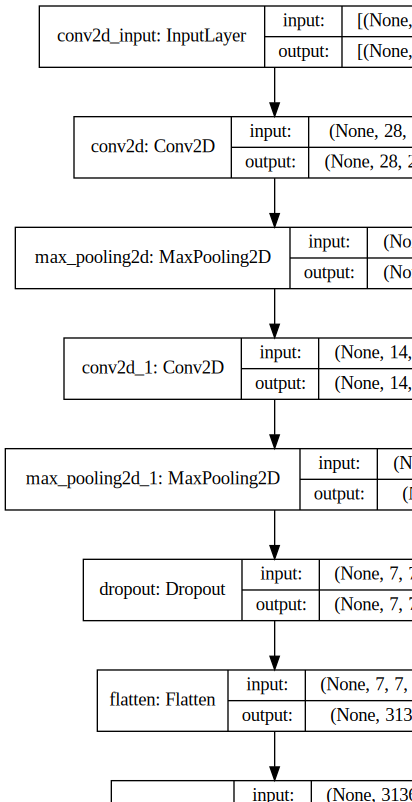

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 10s 6ms/step - loss: 0.4053 - accuracy: 0.8755 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 2/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0601 - accuracy: 0.9814 - val_loss: 0.0327 - val_accuracy: 0.9882
Epoch 3/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 4/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0242 - val_accuracy: 0.9923
Epoch 5/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0258 - val_accuracy: 0.9914
Epoch 6/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0292 - val_accuracy: 0.9906
Epoch 7/12
469/469 [==============================] - 3s 5ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.0219 - val_accuracy: 0.9931
Epoch

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026887373998761177
Test accuracy: 0.9930999875068665


## 1D CNN으로 MNIST 데이터 분류 (메인, 인터넷에서 찾지 말고 가능한 자신이 구현해 볼 것)

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# 모양 (shape) 확인
print('X_train shape', X_train.shape)

X_train shape (60000, 28, 28)


In [11]:
# Train
X_train_size = X_train.shape[0]
input_dim = X_train.shape[1] *  X_train.shape[2]
X_train = np.reshape(X_train, (X_train_size, input_dim))
print(X_train.shape)
# Test
X_test_size = X_test.shape[0]
input_dim = X_test.shape[1] *  X_test.shape[2]
X_test = np.reshape(X_test, (X_test_size, input_dim))
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers import Dense, Dropout, Activation
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784, 1)) 
test_images = test_images.reshape((10000, 784, 1)) 
train_images, test_images = train_images / 255.0, test_images / 255.0

model = Sequential() #모델 생성.

model.add(Conv1D(64, 3, activation='relu', input_shape=(784, 1)))  #Conv1D 모델을 추가한다.

model.add(MaxPooling1D(2)) #Maxpooling 추가를 한다.

model.add(Conv1D(32, 3, activation='relu'))

model.add(MaxPooling1D(2))

model.add(Conv1D(32, 3, activation='relu'))

model.add(Flatten()) 

model.add(Dense(32, activation='relu')) 

model.add(Dense(10, activation='softmax')) 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=1,verbose=1) 

_, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.3947 - accuracy: 0.8744
313/313 - 1s - loss: 0.1240 - accuracy: 0.9631
